# SUMMARY OF ALL THE PREPROCESSING STEPS

1. Import Necessary Libraries
2. Read Dataset
3. Sanity Check on Data
4. Exploratory Data Analysis (EDA)
5. Missing Value Treatments
6. Outliers Treatments
7. Duplicates and Garbage Value Treatments
8. Encoding of Data

Further Clustering and T-test would be applied to give a specific conclusion.

STEP 1: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import os

os.chdir(r"C:\Users\rhydh\OneDrive\Desktop\forage data science Quantium")

Step 2: Read Dataset

In [2]:
df1=pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
df2=pd.read_csv('QVI_purchase_behaviour.csv')

In [4]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
df = pd.merge(df1,df2, on='LYLTY_CARD_NBR')
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [7]:
## CREATING A NEW COLUMN FOR PRODUCT WEIGHT
df['WEIGHT'] = df['PROD_NAME'].str[-4:-1]
df['PROD_NAME'] = df['PROD_NAME'].str[:-4]
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,WEIGHT
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,43599,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175
2,43414,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160
3,43533,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170
...,...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,YOUNG SINGLES/COUPLES,Premium,175
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,YOUNG SINGLES/COUPLES,Premium,175
264833,43410,272,272379,270187,51,Doritos Mexicana,2,8.8,YOUNG SINGLES/COUPLES,Premium,170
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,YOUNG SINGLES/COUPLES,Premium,150


In [8]:
def g(df):
  df['WEIGHT'] = pd.to_numeric(df['WEIGHT'], errors='coerce')
  return df

df = g(df)  

In [9]:
df.dtypes

DATE                  int64
STORE_NBR             int64
LYLTY_CARD_NBR        int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
LIFESTAGE            object
PREMIUM_CUSTOMER     object
WEIGHT              float64
dtype: object

Step 3: Sanity Check on Data

In [10]:
df.shape

(264836, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
 10  WEIGHT            261579 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 22.2+ MB


In [12]:
df.isnull().sum()   #there are no missing values 

DATE                   0
STORE_NBR              0
LYLTY_CARD_NBR         0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
WEIGHT              3257
dtype: int64

In [13]:
df.duplicated().sum()

1

In [14]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

PROD_NAME
Kettle Mozzarella   Basil & Pesto       3304
Kettle Tortilla ChpsHny&Jlpno Chili     3296
Cobs Popd Swt/Chlli &Sr/Cream Chips     3269
Tyrrells Crisps     Ched & Chives       3268
Cobs Popd Sea Salt  Chips               3265
                                        ... 
RRD Pc Sea Salt                         1431
Woolworths Medium   Salsa               1430
NCC Sour Cream &    Garden Chives       1419
French Fries Potato Chips               1418
WW Crinkle Cut      Original            1410
Name: count, Length: 114, dtype: int64
******************************
LIFESTAGE
OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: count, dtype: int64
******************************
PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69691
Name: count, dtype: int64
****************************

Step 4: Exploratory Data Analysis (EDA)

In [15]:
#Descriptive Statistics
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,261579.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,183.017532
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,64.507022
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,150.000000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,170.000000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,175.000000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


In [16]:
df.describe(include="object")

,PROD_NAME,LIFESTAGE,PREMIUM_CUSTOMER
count,264836,264836,264836
unique,114,7,3
top,Kettle Mozzarella Basil & Pesto,OLDER SINGLES/COUPLES,Mainstream
freq,3304,54479,101988


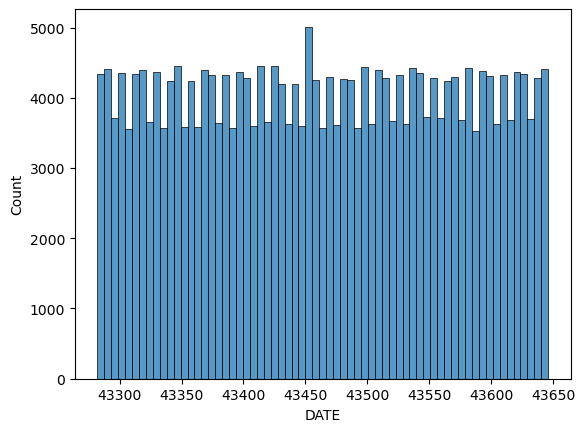

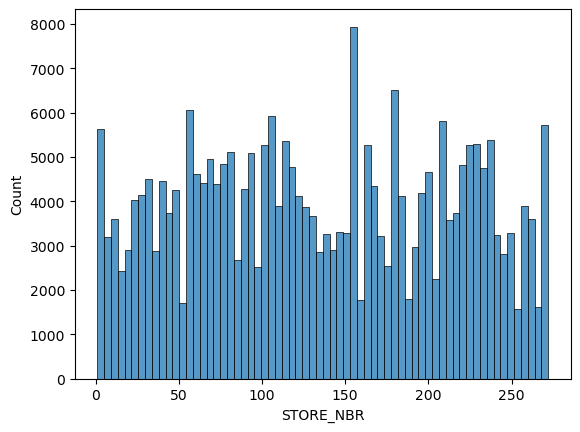

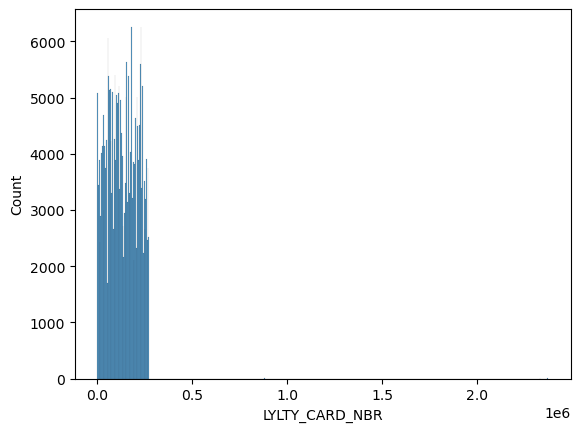

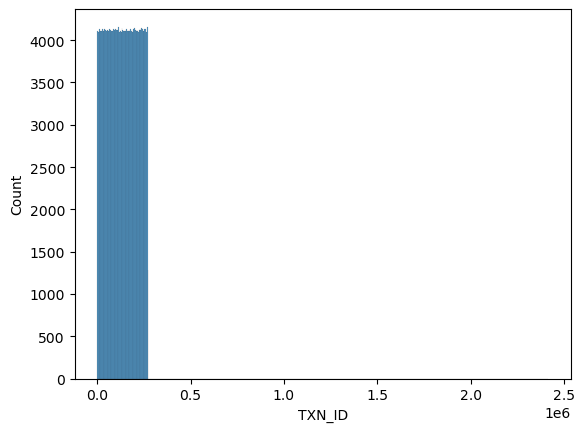

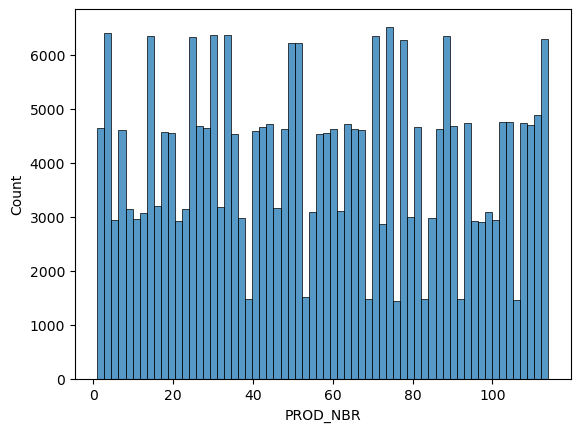

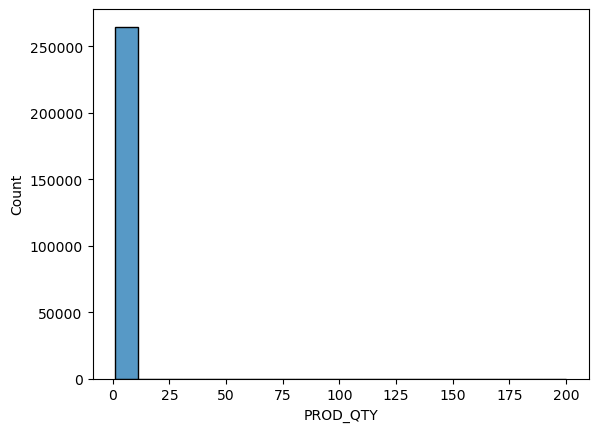

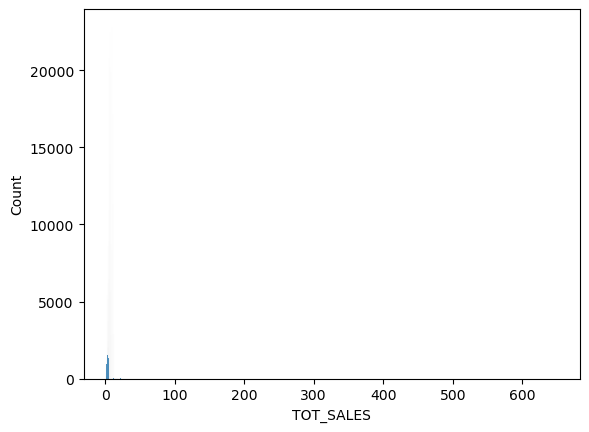

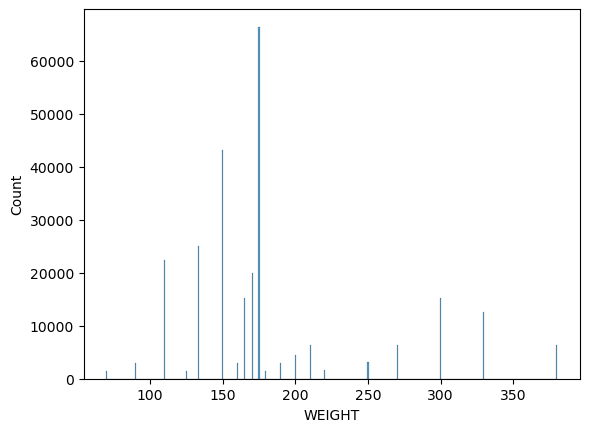

In [17]:
#Histrogram
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

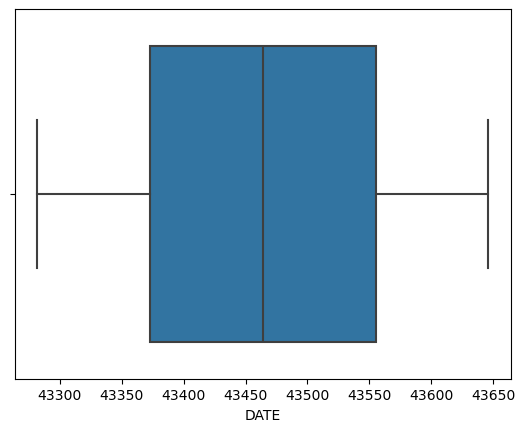

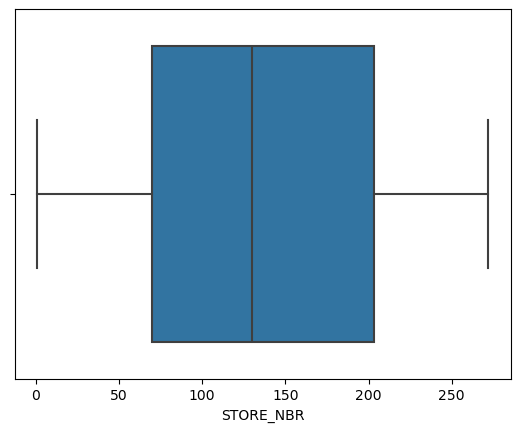

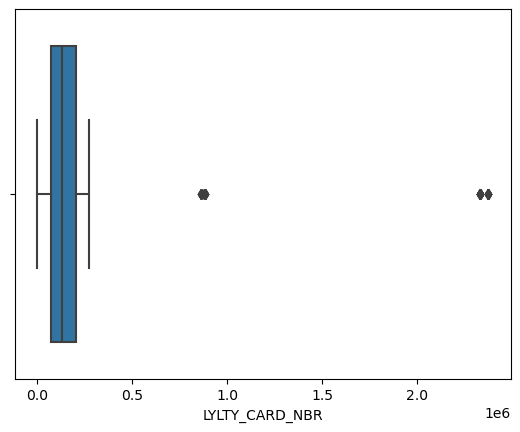

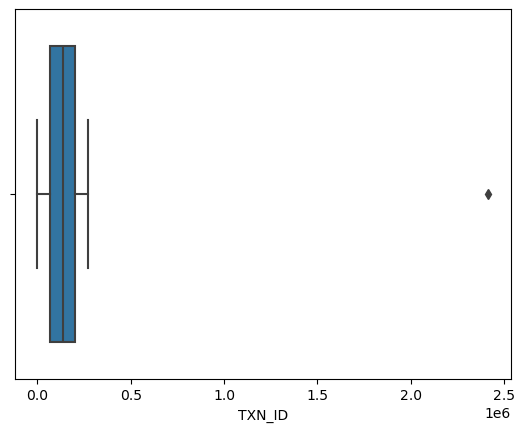

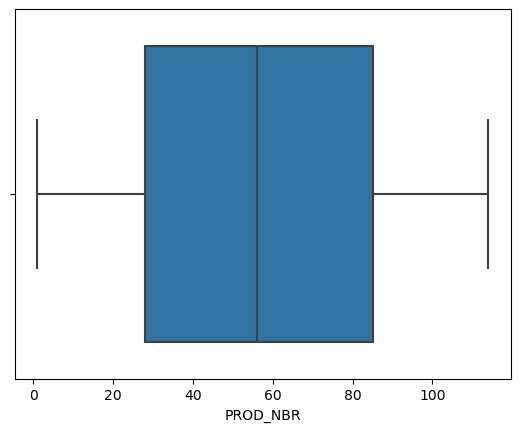

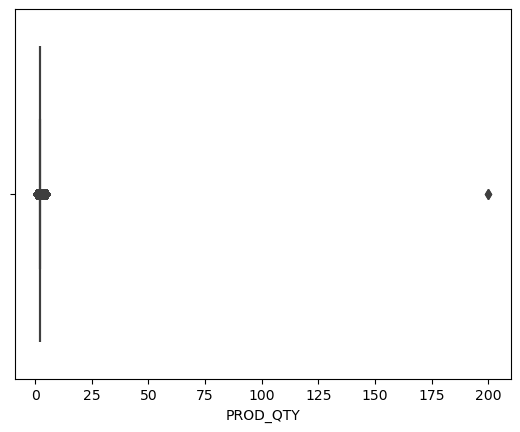

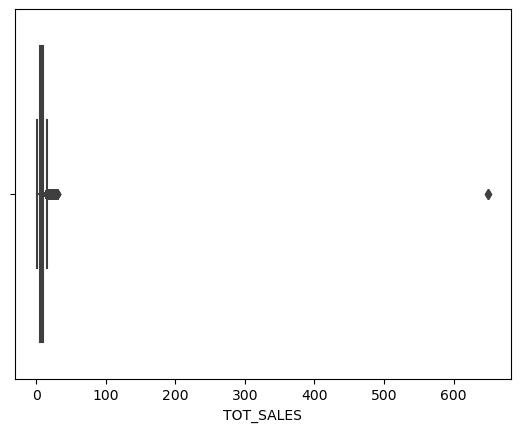

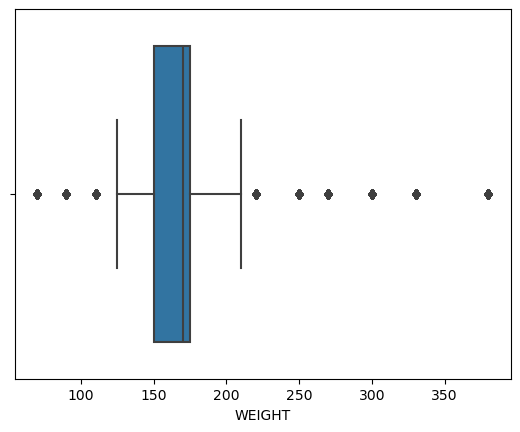

In [18]:
#Boxplot-to-identify-outliers
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [19]:
df.select_dtypes(include="number").columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY',
       'TOT_SALES', 'WEIGHT'],
      dtype='object')

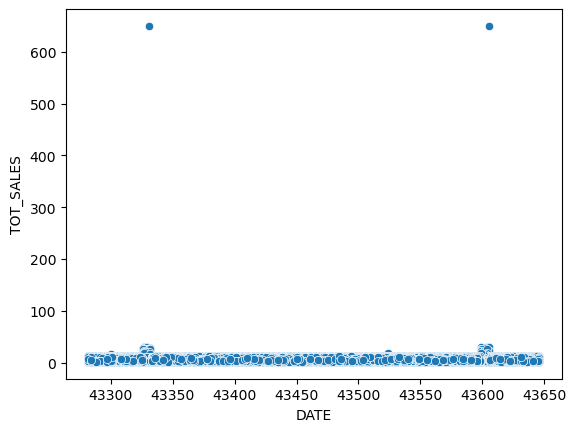

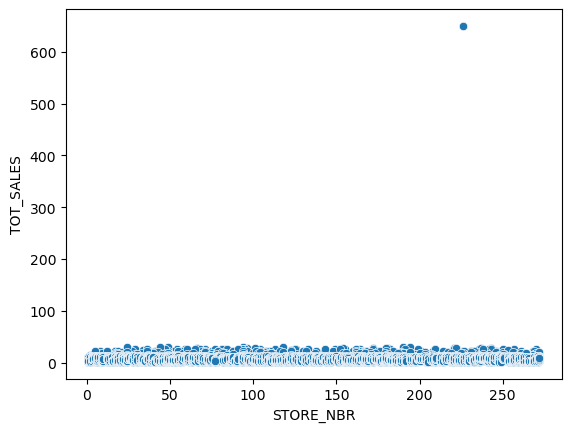

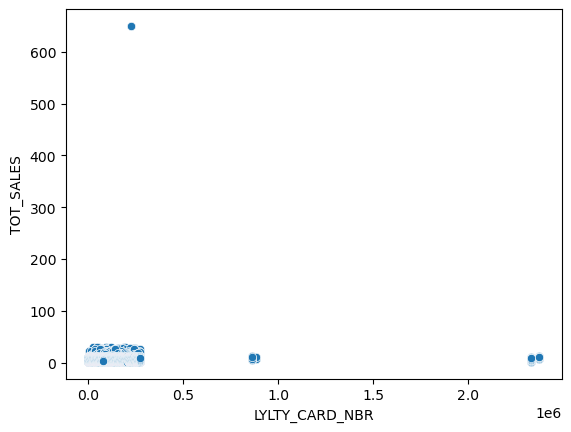

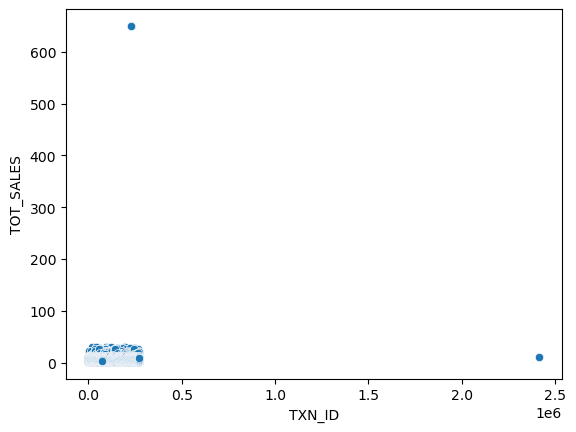

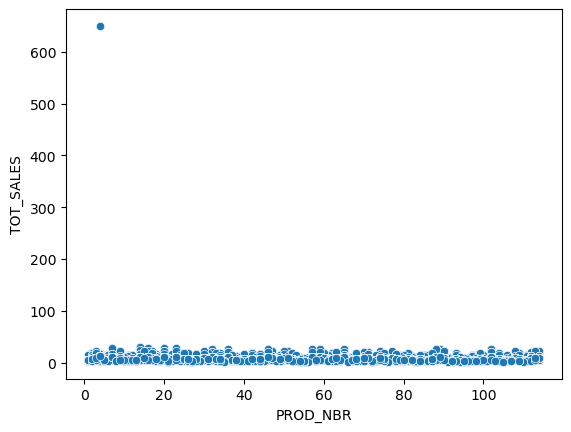

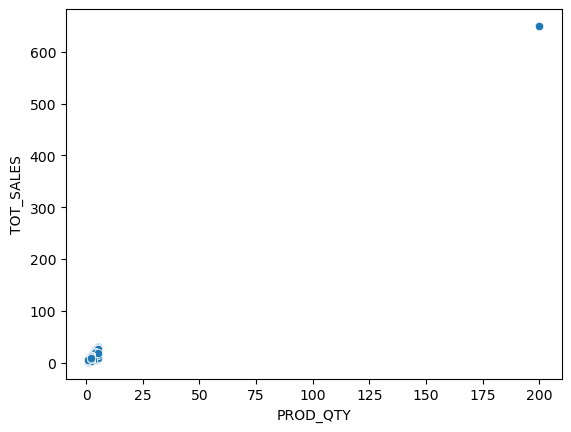

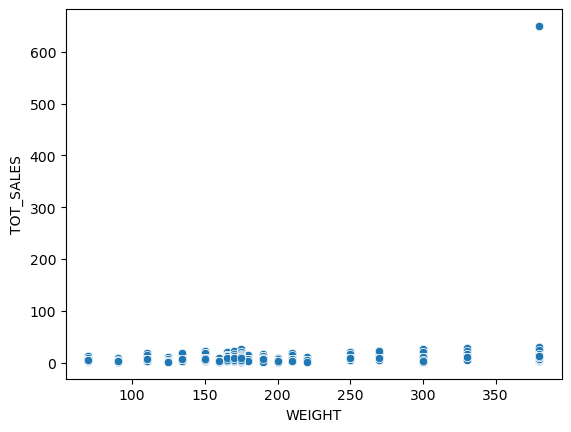

In [20]:
#scatter plot to understand the relationship
for i in ['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY','WEIGHT']:
    sns.scatterplot(data=df,x=i,y='TOT_SALES')
    plt.show()

In [21]:
#correlation with heatmap to interpret the relation and multicollinearity 
s=df.select_dtypes(include="number").corr()

<Axes: >

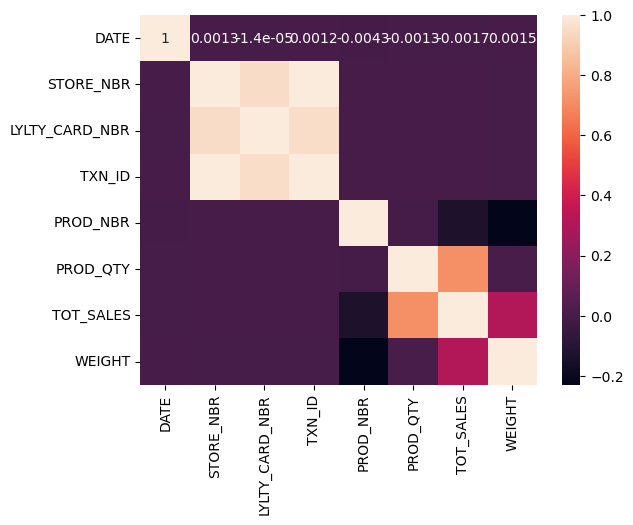

In [22]:
sns.heatmap(s, annot=True)

Step 5: Missing Value Treatment

In [23]:
search_string = 'Kettle 135g Swt Pot Sea '
count = df['PROD_NAME'].str.contains(search_string).sum()
count

3257

In [24]:
df['WEIGHT'] = df['WEIGHT'].fillna(135.0)

In [25]:
df.isna().sum().sum()

0

Step 6: Outliers Treatments

In [26]:
df_out = df.copy() 
def cap_outliers(df, iqr_multiplier=1.5):
  for col in df_out.select_dtypes(include=[np.number]):
    q1 = df_out[col].quantile(0.25)
    q3 = df_out[col].quantile(0.75)
    iqr = q3 - q1
    upper_fence = q3 + (iqr_multiplier * iqr)
    lower_fence = q1 - (iqr_multiplier * iqr)
    df_out.loc[df_out[col] > upper_fence, col] = upper_fence
    df_out.loc[df_out[col] < lower_fence, col] = lower_fence
  return df_out

In [27]:
cap_outliers(df_out, iqr_multiplier=1.5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,WEIGHT
0,43390,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175.0
1,43599,1.0,1307.0,348.0,66.0,CCs Nacho Cheese,2,6.3,MIDAGE SINGLES/COUPLES,Budget,175.0
2,43414,1.0,1307.0,346.0,96.0,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160.0
3,43533,1.0,1307.0,347.0,54.0,CCs Original,2,2.1,MIDAGE SINGLES/COUPLES,Budget,175.0
4,43605,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170.0
...,...,...,...,...,...,...,...,...,...,...,...
264831,43533,272.0,272319.0,270088.0,89.0,Kettle Sweet Chilli And Sour Cream,2,10.8,YOUNG SINGLES/COUPLES,Premium,175.0
264832,43325,272.0,272358.0,270154.0,74.0,Tostitos Splash Of Lime,2,4.4,YOUNG SINGLES/COUPLES,Premium,175.0
264833,43410,272.0,272379.0,270187.0,51.0,Doritos Mexicana,2,8.8,YOUNG SINGLES/COUPLES,Premium,170.0
264834,43461,272.0,272379.0,270188.0,42.0,Doritos Corn Chip Mexican Jalapeno,2,7.8,YOUNG SINGLES/COUPLES,Premium,150.0


In [28]:
df=df_out

In [29]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT
count,264836.000000,264836.00000,264836.000000,264836.000000,264836.000000,264836.0,264836.000000,264836.000000
mean,43464.036260,135.08011,135299.020792,135150.719362,56.583157,2.0,7.288923,166.644595
std,105.389282,76.78418,76856.096716,78009.004447,32.826638,0.0,2.479431,30.226513
min,43282.000000,1.00000,1000.000000,1.000000,1.000000,2.0,1.500000,112.500000
25%,43373.000000,70.00000,70021.000000,67601.500000,28.000000,2.0,5.400000,150.000000
50%,43464.000000,130.00000,130357.500000,135137.500000,56.000000,2.0,7.400000,170.000000
75%,43555.000000,203.00000,203094.250000,202701.250000,85.000000,2.0,9.200000,175.000000
max,43646.000000,272.00000,402704.125000,405350.875000,114.000000,2.0,14.900000,212.500000


Step 7: Duplicates and Garbage Value Treatments

In [30]:
df.drop_duplicates()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,WEIGHT
0,43390,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175.0
1,43599,1.0,1307.0,348.0,66.0,CCs Nacho Cheese,2,6.3,MIDAGE SINGLES/COUPLES,Budget,175.0
2,43414,1.0,1307.0,346.0,96.0,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160.0
3,43533,1.0,1307.0,347.0,54.0,CCs Original,2,2.1,MIDAGE SINGLES/COUPLES,Budget,175.0
4,43605,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170.0
...,...,...,...,...,...,...,...,...,...,...,...
264831,43533,272.0,272319.0,270088.0,89.0,Kettle Sweet Chilli And Sour Cream,2,10.8,YOUNG SINGLES/COUPLES,Premium,175.0
264832,43325,272.0,272358.0,270154.0,74.0,Tostitos Splash Of Lime,2,4.4,YOUNG SINGLES/COUPLES,Premium,175.0
264833,43410,272.0,272379.0,270187.0,51.0,Doritos Mexicana,2,8.8,YOUNG SINGLES/COUPLES,Premium,170.0
264834,43461,272.0,272379.0,270188.0,42.0,Doritos Corn Chip Mexican Jalapeno,2,7.8,YOUNG SINGLES/COUPLES,Premium,150.0


Step 8: Encoding of Data

In [31]:
## Before moving on to the main data encoding, I have tried to seperate the brand name from the flavour in PROD_NAME column.

df['PROD_NAME'].value_counts()

PROD_NAME
Kettle Mozzarella   Basil & Pesto       3304
Kettle Tortilla ChpsHny&Jlpno Chili     3296
Cobs Popd Swt/Chlli &Sr/Cream Chips     3269
Tyrrells Crisps     Ched & Chives       3268
Cobs Popd Sea Salt  Chips               3265
                                        ... 
RRD Pc Sea Salt                         1431
Woolworths Medium   Salsa               1430
NCC Sour Cream &    Garden Chives       1419
French Fries Potato Chips               1418
WW Crinkle Cut      Original            1410
Name: count, Length: 114, dtype: int64

In [32]:
def extract_first_word(df, column_name):
  df['PROD_NAME'] = df['PROD_NAME'].str.split().str[0]
  return df

df = extract_first_word(df, 'PROD_NAME')
print(df)

         DATE  STORE_NBR  LYLTY_CARD_NBR    TXN_ID  PROD_NBR PROD_NAME  \
0       43390        1.0          1000.0       1.0       5.0   Natural   
1       43599        1.0          1307.0     348.0      66.0       CCs   
2       43414        1.0          1307.0     346.0      96.0        WW   
3       43533        1.0          1307.0     347.0      54.0       CCs   
4       43605        1.0          1343.0     383.0      61.0    Smiths   
...       ...        ...             ...       ...       ...       ...   
264831  43533      272.0        272319.0  270088.0      89.0    Kettle   
264832  43325      272.0        272358.0  270154.0      74.0  Tostitos   
264833  43410      272.0        272379.0  270187.0      51.0   Doritos   
264834  43461      272.0        272379.0  270188.0      42.0   Doritos   
264835  43365      272.0        272380.0  270189.0      74.0  Tostitos   

        PROD_QTY  TOT_SALES               LIFESTAGE PREMIUM_CUSTOMER  WEIGHT  
0              2        6.0   YO

Step 9: Feature Selection

In [33]:
# One-Hot Encoding

df=pd.get_dummies(data=df, columns = ['PROD_NAME','LIFESTAGE','PREMIUM_CUSTOMER'], drop_first=False)
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,PROD_NAME_Burger,PROD_NAME_CCs,...,LIFESTAGE_MIDAGE SINGLES/COUPLES,LIFESTAGE_NEW FAMILIES,LIFESTAGE_OLDER FAMILIES,LIFESTAGE_OLDER SINGLES/COUPLES,LIFESTAGE_RETIREES,LIFESTAGE_YOUNG FAMILIES,LIFESTAGE_YOUNG SINGLES/COUPLES,PREMIUM_CUSTOMER_Budget,PREMIUM_CUSTOMER_Mainstream,PREMIUM_CUSTOMER_Premium
0,43390,1.0,1000.0,1.0,5.0,2,6.0,175.0,False,False,...,False,False,False,False,False,False,True,False,False,True
1,43599,1.0,1307.0,348.0,66.0,2,6.3,175.0,False,True,...,True,False,False,False,False,False,False,True,False,False
2,43414,1.0,1307.0,346.0,96.0,2,3.8,160.0,False,False,...,True,False,False,False,False,False,False,True,False,False
3,43533,1.0,1307.0,347.0,54.0,2,2.1,175.0,False,True,...,True,False,False,False,False,False,False,True,False,False
4,43605,1.0,1343.0,383.0,61.0,2,2.9,170.0,False,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,43533,272.0,272319.0,270088.0,89.0,2,10.8,175.0,False,False,...,False,False,False,False,False,False,True,False,False,True
264832,43325,272.0,272358.0,270154.0,74.0,2,4.4,175.0,False,False,...,False,False,False,False,False,False,True,False,False,True
264833,43410,272.0,272379.0,270187.0,51.0,2,8.8,170.0,False,False,...,False,False,False,False,False,False,True,False,False,True
264834,43461,272.0,272379.0,270188.0,42.0,2,7.8,150.0,False,False,...,False,False,False,False,False,False,True,False,False,True


In [34]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY',
       'TOT_SALES', 'WEIGHT', 'PROD_NAME_Burger', 'PROD_NAME_CCs',
       'PROD_NAME_Cheetos', 'PROD_NAME_Cheezels', 'PROD_NAME_Cobs',
       'PROD_NAME_Dorito', 'PROD_NAME_Doritos', 'PROD_NAME_French',
       'PROD_NAME_Grain', 'PROD_NAME_GrnWves', 'PROD_NAME_Infuzions',
       'PROD_NAME_Infzns', 'PROD_NAME_Kettle', 'PROD_NAME_NCC',
       'PROD_NAME_Natural', 'PROD_NAME_Old', 'PROD_NAME_Pringles',
       'PROD_NAME_RRD', 'PROD_NAME_Red', 'PROD_NAME_Smith', 'PROD_NAME_Smiths',
       'PROD_NAME_Snbts', 'PROD_NAME_Sunbites', 'PROD_NAME_Thins',
       'PROD_NAME_Tostitos', 'PROD_NAME_Twisties', 'PROD_NAME_Tyrrells',
       'PROD_NAME_WW', 'PROD_NAME_Woolworths',
       'LIFESTAGE_MIDAGE SINGLES/COUPLES', 'LIFESTAGE_NEW FAMILIES',
       'LIFESTAGE_OLDER FAMILIES', 'LIFESTAGE_OLDER SINGLES/COUPLES',
       'LIFESTAGE_RETIREES', 'LIFESTAGE_YOUNG FAMILIES',
       'LIFESTAGE_YOUNG SINGLES/COUPLES', 'PREMIUM_CU

# CLUSTERING

In [35]:
# Select numerical features for clustering
features = df[['PROD_QTY', 'TOT_SALES', 'WEIGHT'] + [col for col in df.columns if col.startswith('LIFESTAGE_') or col.startswith('PREMIUM_CUSTOMER_')]]

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

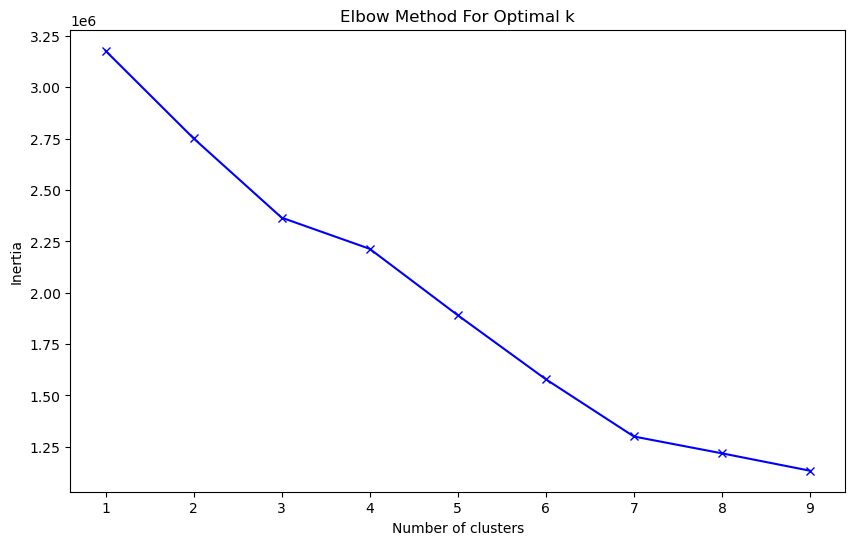

In [38]:
# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [39]:
# Based on the plot, choose the appropriate number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [40]:
df['Cluster'].value_counts()

Cluster
0    101988
2     93157
1     69691
Name: count, dtype: int64

In [41]:
df.shape

(264836, 48)

In [123]:
import pandas as pd
import numpy as np

# Sample size calculation (adjust as needed)
# This example uses a confidence level of 95% and a margin of error of 5%
population_size = 264836  # Replace with your actual population size
confidence_level = 0.95
margin_of_error = 0.05
sample_size = int(np.sqrt((population_size * (1 - confidence_level)) / (margin_of_error**2)))

# Sample the DataFrame using random sampling
sample = df.sample(sample_size, random_state=42)  # Set random state for reproducibility

# Print the sample size and DataFrame shape
print(f"Sample size: {sample_size}")
print(f"Sample DataFrame shape: {sample.shape}")

# Explore the sample to see if it reflects the population (further analysis recommended)
print(sample.head())  # View the first few rows of the sample

Sample size: 2301
Sample DataFrame shape: (2301, 48)
         DATE  STORE_NBR  LYLTY_CARD_NBR    TXN_ID  PROD_NBR  PROD_QTY  \
147374  43614      212.0        212063.0  210844.0      60.0         2   
18693   43612       10.0         10078.0    9497.0      50.0         2   
98522   43316      261.0        261050.0  259925.0      49.0         2   
65042   43377      157.0        157105.0  159090.0      33.0         2   
176861  43378       68.0         68138.0   65519.0      46.0         2   

        TOT_SALES  WEIGHT  PROD_NAME_Burger  PROD_NAME_CCs  ...  \
147374        9.2   150.0             False          False  ...   
18693         8.8   175.0             False          False  ...   
98522         7.6   112.5             False          False  ...   
65042         7.6   112.5             False          False  ...   
176861       10.8   175.0             False          False  ...   

        LIFESTAGE_NEW FAMILIES  LIFESTAGE_OLDER FAMILIES  \
147374                   False         

In [43]:
sample['Cluster'].value_counts()

Cluster
0    876
2    812
1    613
Name: count, dtype: int64

In [44]:
sample.drop('Cluster', axis=1, inplace=True)

In [45]:
sample.shape

(2301, 47)

In [46]:
# Select numerical features for clustering of the sample
features = sample[['PROD_QTY', 'TOT_SALES', 'WEIGHT'] + [col for col in sample.columns if col.startswith('LIFESTAGE_') or col.startswith('PREMIUM_CUSTOMER_')]]

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

In [49]:
# Based on the plot, choose the appropriate number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
sample['Cluster'] = kmeans.fit_predict(scaled_features)

In [50]:
sample['Cluster'].value_counts()

Cluster
0    876
1    812
2    613
Name: count, dtype: int64

In [51]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_features, sample['Cluster'])
print('Silhouette Score:', score)

Silhouette Score: 0.21246825163169997


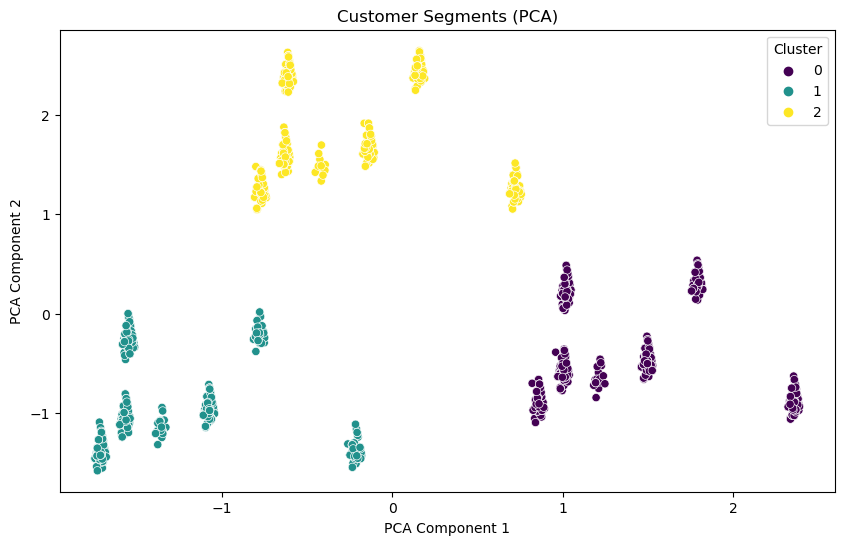

In [52]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot the clusters using PCA-reduced features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=sample['Cluster'], palette='viridis')
plt.title('Customer Segments (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [53]:
zero_cluster=sample[sample['Cluster'] == 0]

In [54]:
zero_cluster.dtypes

DATE                                  int64
STORE_NBR                           float64
LYLTY_CARD_NBR                      float64
TXN_ID                              float64
PROD_NBR                            float64
PROD_QTY                              int64
TOT_SALES                           float64
WEIGHT                              float64
PROD_NAME_Burger                       bool
PROD_NAME_CCs                          bool
PROD_NAME_Cheetos                      bool
PROD_NAME_Cheezels                     bool
PROD_NAME_Cobs                         bool
PROD_NAME_Dorito                       bool
PROD_NAME_Doritos                      bool
PROD_NAME_French                       bool
PROD_NAME_Grain                        bool
PROD_NAME_GrnWves                      bool
PROD_NAME_Infuzions                    bool
PROD_NAME_Infzns                       bool
PROD_NAME_Kettle                       bool
PROD_NAME_NCC                          bool
PROD_NAME_Natural               

In [55]:
zero_cluster.tail(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,PROD_NAME_Burger,PROD_NAME_CCs,...,LIFESTAGE_NEW FAMILIES,LIFESTAGE_OLDER FAMILIES,LIFESTAGE_OLDER SINGLES/COUPLES,LIFESTAGE_RETIREES,LIFESTAGE_YOUNG FAMILIES,LIFESTAGE_YOUNG SINGLES/COUPLES,PREMIUM_CUSTOMER_Budget,PREMIUM_CUSTOMER_Mainstream,PREMIUM_CUSTOMER_Premium,Cluster
205575,43614,152.0,152181.0,151430.0,75.0,2,7.6,112.5,False,False,...,False,False,False,False,True,False,False,True,False,0
250976,43444,154.0,154033.0,153599.0,14.0,2,11.8,212.5,False,False,...,False,False,False,False,False,True,False,True,False,0
65739,43480,178.0,178074.0,178017.0,88.0,2,10.8,175.0,False,False,...,False,True,False,False,False,False,False,True,False,0
104920,43301,40.0,40182.0,36938.0,36.0,2,10.8,175.0,False,False,...,False,False,True,False,False,False,False,True,False,0
67689,43632,226.0,226243.0,227524.0,40.0,2,6.6,175.0,False,False,...,False,True,False,False,False,False,False,True,False,0
256652,43294,241.0,241198.0,245687.0,113.0,2,9.2,212.5,False,False,...,False,False,False,False,False,True,False,True,False,0
207269,43325,14.0,14218.0,12714.0,48.0,2,5.4,150.0,False,False,...,False,False,False,False,True,False,False,True,False,0
245396,43354,67.0,67086.0,64318.0,43.0,2,5.2,150.0,False,False,...,False,False,False,False,False,True,False,True,False,0
248215,43509,113.0,113123.0,116217.0,88.0,2,10.8,175.0,False,False,...,False,False,False,False,False,True,False,True,False,0
248713,43410,121.0,121436.0,124560.0,81.0,2,7.4,134.0,False,False,...,False,False,False,False,False,True,False,True,False,0


In [56]:
product_counts_in0 = {
    "Burger": 0,
    "CCs": 0,
    "Cheetos": 0,
    "Cheezels": 0,
    "Cobs": 0,
    "Dorito": 0,
    "Doritos": 0,
    "French": 0,
    "Grain": 0,
    "GrnWves": 0,
    "Infuzions": 0,
    "Infzns": 0,
    "Kettle": 0,
    "NCC": 0,
    "Natural": 0,
    "Old": 0,
    "Pringles": 0,
    "RRD": 0,
    "Red": 0,
    "Smith": 0,
    "Smiths": 0,
    "Snbts": 0,
    "Sunbites": 0,
    "Thins": 0,
    "Tostitos": 0,
    "Twisties": 0,
    "Tyrrells": 0,
    "WW": 0,
    "Woolworths": 0
}

# Assuming you have a DataFrame named df
for column in df.columns:
    if column.startswith("PROD_NAME_"):
        product_name = column.split("_", 2)[-1]
        product_counts_in0[product_name] += zero_cluster[column].sum()

print(product_counts_in0)


{'Burger': 3, 'CCs': 14, 'Cheetos': 10, 'Cheezels': 17, 'Cobs': 24, 'Dorito': 9, 'Doritos': 79, 'French': 0, 'Grain': 23, 'GrnWves': 3, 'Infuzions': 35, 'Infzns': 7, 'Kettle': 150, 'NCC': 3, 'Natural': 22, 'Old': 29, 'Pringles': 93, 'RRD': 31, 'Red': 23, 'Smith': 6, 'Smiths': 91, 'Snbts': 8, 'Sunbites': 6, 'Thins': 48, 'Tostitos': 40, 'Twisties': 32, 'Tyrrells': 21, 'WW': 32, 'Woolworths': 17}


In [57]:
from tabulate import tabulate

table0 = []
for product, count in product_counts_in0.items():
    table0.append([product, count])

print(tabulate(table0, headers=["Product Name", "Count in cl 0"]))


Product Name      Count in cl 0
--------------  ---------------
Burger                        3
CCs                          14
Cheetos                      10
Cheezels                     17
Cobs                         24
Dorito                        9
Doritos                      79
French                        0
Grain                        23
GrnWves                       3
Infuzions                    35
Infzns                        7
Kettle                      150
NCC                           3
Natural                      22
Old                          29
Pringles                     93
RRD                          31
Red                          23
Smith                         6
Smiths                       91
Snbts                         8
Sunbites                      6
Thins                        48
Tostitos                     40
Twisties                     32
Tyrrells                     21
WW                           32
Woolworths                   17


In [58]:
one_cluster=sample[sample['Cluster'] == 1]

In [59]:
product_counts_in1 = {
    "Burger": 0,
    "CCs": 0,
    "Cheetos": 0,
    "Cheezels": 0,
    "Cobs": 0,
    "Dorito": 0,
    "Doritos": 0,
    "French": 0,
    "Grain": 0,
    "GrnWves": 0,
    "Infuzions": 0,
    "Infzns": 0,
    "Kettle": 0,
    "NCC": 0,
    "Natural": 0,
    "Old": 0,
    "Pringles": 0,
    "RRD": 0,
    "Red": 0,
    "Smith": 0,
    "Smiths": 0,
    "Snbts": 0,
    "Sunbites": 0,
    "Thins": 0,
    "Tostitos": 0,
    "Twisties": 0,
    "Tyrrells": 0,
    "WW": 0,
    "Woolworths": 0
}

# Assuming you have a DataFrame named df
for column in df.columns:
    if column.startswith("PROD_NAME_"):
        product_name = column.split("_", 2)[-1]
        product_counts_in1[product_name] += one_cluster[column].sum()

print(product_counts_in1)


{'Burger': 4, 'CCs': 10, 'Cheetos': 8, 'Cheezels': 9, 'Cobs': 36, 'Dorito': 11, 'Doritos': 85, 'French': 6, 'Grain': 15, 'GrnWves': 6, 'Infuzions': 45, 'Infzns': 8, 'Kettle': 130, 'NCC': 5, 'Natural': 24, 'Old': 27, 'Pringles': 77, 'RRD': 42, 'Red': 15, 'Smith': 10, 'Smiths': 69, 'Snbts': 7, 'Sunbites': 4, 'Thins': 33, 'Tostitos': 24, 'Twisties': 34, 'Tyrrells': 18, 'WW': 35, 'Woolworths': 15}


In [60]:
from tabulate import tabulate

table1 = []
for product, count in product_counts_in1.items():
    table1.append([product, count])

print(tabulate(table1, headers=["Product Name", "Count in cl 1"]))

Product Name      Count in cl 1
--------------  ---------------
Burger                        4
CCs                          10
Cheetos                       8
Cheezels                      9
Cobs                         36
Dorito                       11
Doritos                      85
French                        6
Grain                        15
GrnWves                       6
Infuzions                    45
Infzns                        8
Kettle                      130
NCC                           5
Natural                      24
Old                          27
Pringles                     77
RRD                          42
Red                          15
Smith                        10
Smiths                       69
Snbts                         7
Sunbites                      4
Thins                        33
Tostitos                     24
Twisties                     34
Tyrrells                     18
WW                           35
Woolworths                   15


In [61]:
two_cluster=sample[sample['Cluster'] == 2]
two_cluster.shape

(613, 48)

In [62]:
product_counts_in2 = {
    "Burger": 0,
    "CCs": 0,
    "Cheetos": 0,
    "Cheezels": 0,
    "Cobs": 0,
    "Dorito": 0,
    "Doritos": 0,
    "French": 0,
    "Grain": 0,
    "GrnWves": 0,
    "Infuzions": 0,
    "Infzns": 0,
    "Kettle": 0,
    "NCC": 0,
    "Natural": 0,
    "Old": 0,
    "Pringles": 0,
    "RRD": 0,
    "Red": 0,
    "Smith": 0,
    "Smiths": 0,
    "Snbts": 0,
    "Sunbites": 0,
    "Thins": 0,
    "Tostitos": 0,
    "Twisties": 0,
    "Tyrrells": 0,
    "WW": 0,
    "Woolworths": 0
}

# Assuming you have a DataFrame named df
for column in df.columns:
    if column.startswith("PROD_NAME_"):
        product_name = column.split("_", 2)[-1]
        product_counts_in2[product_name] += two_cluster[column].sum()

print(product_counts_in2)


{'Burger': 5, 'CCs': 7, 'Cheetos': 5, 'Cheezels': 12, 'Cobs': 21, 'Dorito': 7, 'Doritos': 61, 'French': 1, 'Grain': 17, 'GrnWves': 3, 'Infuzions': 24, 'Infzns': 13, 'Kettle': 109, 'NCC': 3, 'Natural': 14, 'Old': 17, 'Pringles': 55, 'RRD': 23, 'Red': 8, 'Smith': 7, 'Smiths': 73, 'Snbts': 3, 'Sunbites': 3, 'Thins': 25, 'Tostitos': 25, 'Twisties': 25, 'Tyrrells': 11, 'WW': 28, 'Woolworths': 8}


In [63]:
from tabulate import tabulate

table2 = []
for product, count in product_counts_in2.items():
    table2.append([product, count])

print(tabulate(table2, headers=["Product Name", "Count in cl 2"]))

Product Name      Count in cl 2
--------------  ---------------
Burger                        5
CCs                           7
Cheetos                       5
Cheezels                     12
Cobs                         21
Dorito                        7
Doritos                      61
French                        1
Grain                        17
GrnWves                       3
Infuzions                    24
Infzns                       13
Kettle                      109
NCC                           3
Natural                      14
Old                          17
Pringles                     55
RRD                          23
Red                           8
Smith                         7
Smiths                       73
Snbts                         3
Sunbites                      3
Thins                        25
Tostitos                     25
Twisties                     25
Tyrrells                     11
WW                           28
Woolworths                    8


In [64]:
table0 = pd.DataFrame(table0, columns=['Product Name','Count in cl 0'])
table1 = pd.DataFrame(table1, columns=['Product Name','Count in cl 1'])
table2 = pd.DataFrame(table2, columns=['Product Name','Count in cl 2'])

In [65]:
table01 = table0.merge(table1, on='Product Name')

In [66]:
product_counts_in_all_clusters = table01.merge(table2, on='Product Name')

In [67]:
product_counts_in_all_clusters

,Product Name,Count in cl 0,Count in cl 1,Count in cl 2
0,Burger,3,4,5
1,CCs,14,10,7
2,Cheetos,10,8,5
3,Cheezels,17,9,12
4,Cobs,24,36,21
5,Dorito,9,11,7
6,Doritos,79,85,61
7,French,0,6,1
8,Grain,23,15,17
9,GrnWves,3,6,3


In [68]:
def find_max_min(df):
    for col in product_counts_in_all_clusters.columns[1:]:
        max_val = product_counts_in_all_clusters[col].max()
        max_product = product_counts_in_all_clusters.loc[product_counts_in_all_clusters[col] == max_val, 'Product Name'].values[0]
        min_val = product_counts_in_all_clusters[col].min()
        min_product = product_counts_in_all_clusters.loc[product_counts_in_all_clusters[col] == min_val, 'Product Name'].values[0]
        print(f"Maximum value in column {col}: {max_val} (Product: {max_product})")
        print(f"Minimum value in column {col}: {min_val} (Product: {min_product})")

find_max_min(product_counts_in_all_clusters)

Maximum value in column Count in cl 0: 150 (Product: Kettle)
Minimum value in column Count in cl 0: 0 (Product: French)
Maximum value in column Count in cl 1: 130 (Product: Kettle)
Minimum value in column Count in cl 1: 4 (Product: Burger)
Maximum value in column Count in cl 2: 109 (Product: Kettle)
Minimum value in column Count in cl 2: 1 (Product: French)


In [69]:
# Therefore, Kettle products are popular in all 3 clusters

In [70]:
# Back to Sample
sample.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,WEIGHT,PROD_NAME_Burger,PROD_NAME_CCs,...,LIFESTAGE_NEW FAMILIES,LIFESTAGE_OLDER FAMILIES,LIFESTAGE_OLDER SINGLES/COUPLES,LIFESTAGE_RETIREES,LIFESTAGE_YOUNG FAMILIES,LIFESTAGE_YOUNG SINGLES/COUPLES,PREMIUM_CUSTOMER_Budget,PREMIUM_CUSTOMER_Mainstream,PREMIUM_CUSTOMER_Premium,Cluster
147374,43614,212.0,212063.0,210844.0,60.0,2,9.2,150.0,False,False,...,False,False,False,True,False,False,True,False,False,1
18693,43612,10.0,10078.0,9497.0,50.0,2,8.8,175.0,False,False,...,False,False,False,False,False,False,False,False,True,2
98522,43316,261.0,261050.0,259925.0,49.0,2,7.6,112.5,False,False,...,False,False,True,False,False,False,True,False,False,1
65042,43377,157.0,157105.0,159090.0,33.0,2,7.6,112.5,False,False,...,False,True,False,False,False,False,False,True,False,0
176861,43378,68.0,68138.0,65519.0,46.0,2,10.8,175.0,False,False,...,False,False,False,True,False,False,False,False,True,2


In [71]:
sample.groupby('Cluster')['TOT_SALES'].mean()

Cluster
0    7.361758
1    7.314101
2    7.408320
Name: TOT_SALES, dtype: float64

In [72]:
sample.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY',
       'TOT_SALES', 'WEIGHT', 'PROD_NAME_Burger', 'PROD_NAME_CCs',
       'PROD_NAME_Cheetos', 'PROD_NAME_Cheezels', 'PROD_NAME_Cobs',
       'PROD_NAME_Dorito', 'PROD_NAME_Doritos', 'PROD_NAME_French',
       'PROD_NAME_Grain', 'PROD_NAME_GrnWves', 'PROD_NAME_Infuzions',
       'PROD_NAME_Infzns', 'PROD_NAME_Kettle', 'PROD_NAME_NCC',
       'PROD_NAME_Natural', 'PROD_NAME_Old', 'PROD_NAME_Pringles',
       'PROD_NAME_RRD', 'PROD_NAME_Red', 'PROD_NAME_Smith', 'PROD_NAME_Smiths',
       'PROD_NAME_Snbts', 'PROD_NAME_Sunbites', 'PROD_NAME_Thins',
       'PROD_NAME_Tostitos', 'PROD_NAME_Twisties', 'PROD_NAME_Tyrrells',
       'PROD_NAME_WW', 'PROD_NAME_Woolworths',
       'LIFESTAGE_MIDAGE SINGLES/COUPLES', 'LIFESTAGE_NEW FAMILIES',
       'LIFESTAGE_OLDER FAMILIES', 'LIFESTAGE_OLDER SINGLES/COUPLES',
       'LIFESTAGE_RETIREES', 'LIFESTAGE_YOUNG FAMILIES',
       'LIFESTAGE_YOUNG SINGLES/COUPLES', 'PREMIUM_CU

In [78]:
# Columns to sum
premium_columns = [
    'PREMIUM_CUSTOMER_Budget',
    'PREMIUM_CUSTOMER_Mainstream',
    'PREMIUM_CUSTOMER_Premium'
]

# Group by 'Cluster' and sum the specified columns
sample.groupby('Cluster')[premium_columns].sum()

,PREMIUM_CUSTOMER_Budget,PREMIUM_CUSTOMER_Mainstream,PREMIUM_CUSTOMER_Premium
Cluster,,,
0,0,876,0
1,812,0,0
2,0,0,613


In [81]:
# Columns to sum
lifestage_columns = [
'LIFESTAGE_MIDAGE SINGLES/COUPLES', 'LIFESTAGE_NEW FAMILIES',
       'LIFESTAGE_OLDER FAMILIES', 'LIFESTAGE_OLDER SINGLES/COUPLES',
       'LIFESTAGE_RETIREES', 'LIFESTAGE_YOUNG FAMILIES',
       'LIFESTAGE_YOUNG SINGLES/COUPLES'
]

# Group by 'Cluster' and sum the specified columns
lf=sample.groupby('Cluster')[lifestage_columns].sum()
lf

,LIFESTAGE_MIDAGE SINGLES/COUPLES,LIFESTAGE_NEW FAMILIES,LIFESTAGE_OLDER FAMILIES,LIFESTAGE_OLDER SINGLES/COUPLES,LIFESTAGE_RETIREES,LIFESTAGE_YOUNG FAMILIES,LIFESTAGE_YOUNG SINGLES/COUPLES
Cluster,,,,,,,
0,96,21,128,148,170,115,198
1,46,25,191,177,144,154,75
2,75,14,99,156,111,97,61


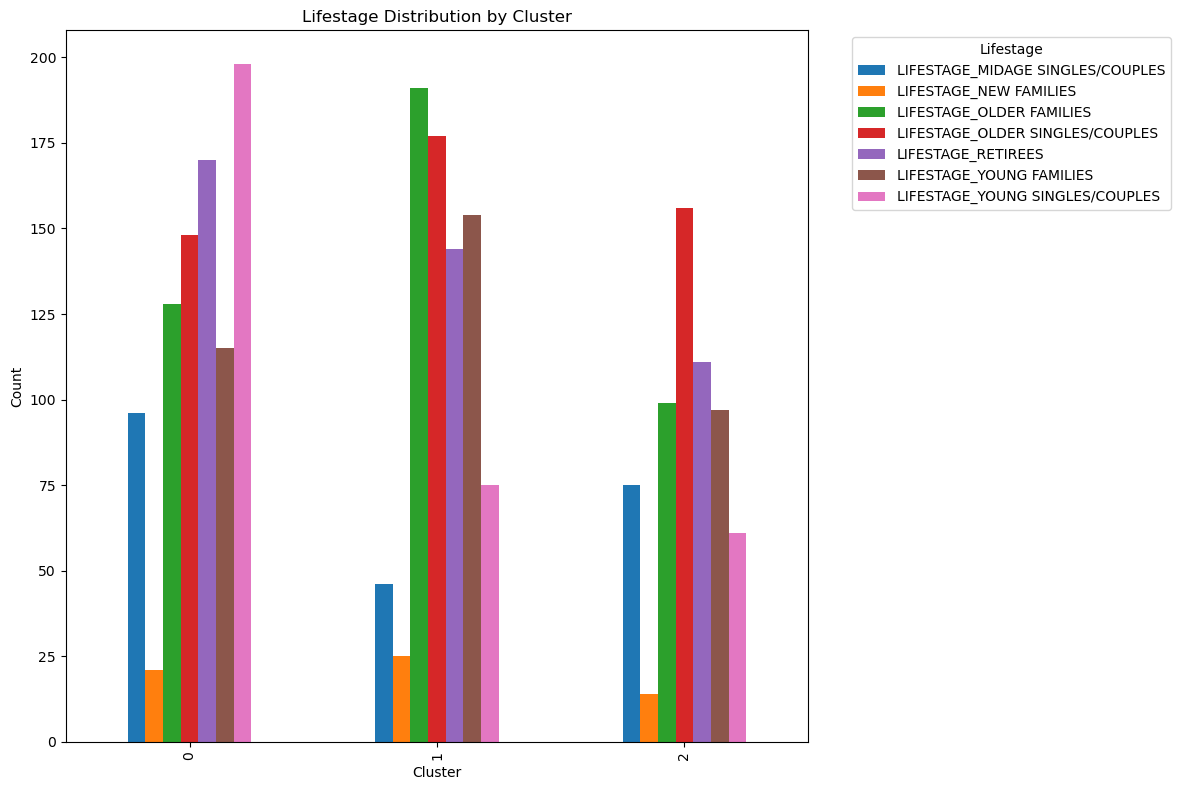

In [101]:
# Plot the data
lf.plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.title('Lifestage Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Lifestage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()